You can follow along and play with this notebook by clicking the badge below

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/COGS118A/demo_notebooks/blob/main/lecture_10_metrics.ipynb)

In [1]:
# two useful data viz libraries
import matplotlib.pyplot as plt
import seaborn as sns

# setup plotting in a notebook in a reasonable way
%matplotlib inline
%config InlineBackend.figure_format='retina'

# default figure aesthetics I'll be using, 
# there are other choices, see seaborn docs
sns.set_style("darkgrid")
sns.set_context("notebook")

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cancerdata = load_breast_cancer(as_frame=True)

X = cancerdata['data']
y = cancerdata['target']

#here's our training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=101)

In [3]:
print(X.shape)
X.describe()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
# looks like the targets are binary coded; 62% positive class!!!
y.describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [5]:
# so it looks like these measurements (whatever they are)
# span over 5 orders of magnitude (median measurements range from 0.003 to 686)
# better use a scaler!
Xdesc = X.describe()
Xdesc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
Xdesc.loc['50%'].describe()

count     30.000000
mean      50.799371
std      157.191188
min        0.003187
25%        0.061540
50%        0.195550
75%       14.570000
max      686.500000
Name: 50%, dtype: float64

- forming z scores in fit
- you can overfit when scaler with train and test , you use fit on train and test

- sklearn roc curve display visual
- LOgistic regression to train scale, reaches error of limits reached from gradient descent
  - if solver isnt work up max_iter

In [7]:
scaler = StandardScaler()

scaler.fit(X_train)

# last time around I showed you a method that put the scaled stuff
# back into the same columns as the orginal data
# this time there's no categorical data to worry aobut so just do the easy thing
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


Here I'm going to define some convenience functions... My goal is to see how different classifiers compare to each other by comparing their metrics.  It sucks to have to copy/paste cells to see the same output for different models.  So lets try to make our lives easier with a single set of functions that we just call with different setups.


HINT: this is still crappy.  In a little while we will see how sklearn can make this even easier!

In [28]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

# train a model and give training set error and test set error
def train_test_predictions(model, X_tr, y_tr, X_te):
    model.fit(X_tr,y_tr)
    return model.predict(X_tr), model.predict(X_te)

# do a bunch of metrics on any model result you'd like
def show_metrics(y_tr, y_te, yhat_tr, yhat_te, named):
    # accuracy scores for training and test sets
    acc_train = accuracy_score(y_tr, yhat_tr)
    acc_test = accuracy_score(y_te, yhat_te)

    print(f'training set accuracy (n={y_tr.shape[0]}): {acc_train:4.3f}')
    print(f'test set accuracy (n={y_te.shape[0]}): {acc_test:4.3f}')
    print()
    print('classificiation report on test set performance')
    print(classification_report(y_te, yhat_te))
    print()

    with sns.axes_style('white'):
        # confusion matrix
        ConfusionMatrixDisplay.from_predictions(y_te, yhat_te)
        plt.show()
        
        # roc-auc
        fpr, tpr, thresholds = roc_curve(y_te, yhat_te) 
        roc_auc = auc(fpr, tpr)
        RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name=named)
        #display.plot()
        plt.show()
        
        #precision recall curve
        PrecisionRecallDisplay.from_predictions(y_te, yhat_te, name=named)
        plt.show()
        

IndentationError: ignored

Ok lets try training a default Logistic Regression on this dataset... (remember the default LR has an L2 penalty with strength C=1)

In [29]:
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
model = LogisticRegression()

yhat_train, yhat_test = train_test_predictions(model, X_train, y_train, X_test)
yhat_train_scaled, yhat_test_scaled = train_test_predictions(model, X_train_scaled, y_train, X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


uh oh! The solver is not converging... the gradient descent is hitting its maximum number of steps before the gradient is hitting the requested threshold tolerance (no bigger than x).  

To fix that we can simply up the maximum number of allowable iterations to help the solver find the arg min

In [30]:
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
model = LogisticRegression(max_iter=20000)

yhat_train, yhat_test = train_test_predictions(model, X_train, y_train, X_test)
yhat_train_scaled, yhat_test_scaled = train_test_predictions(model, X_train_scaled, y_train, X_test_scaled)

OK, note that above I've got both the raw data and z-scored data (StandardScaler) versions of the model... which one is better??

training set accuracy (n=284): 0.982
test set accuracy (n=285): 0.923

classificiation report on test set performance
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       108
           1       0.91      0.97      0.94       177

    accuracy                           0.92       285
   macro avg       0.93      0.91      0.92       285
weighted avg       0.92      0.92      0.92       285




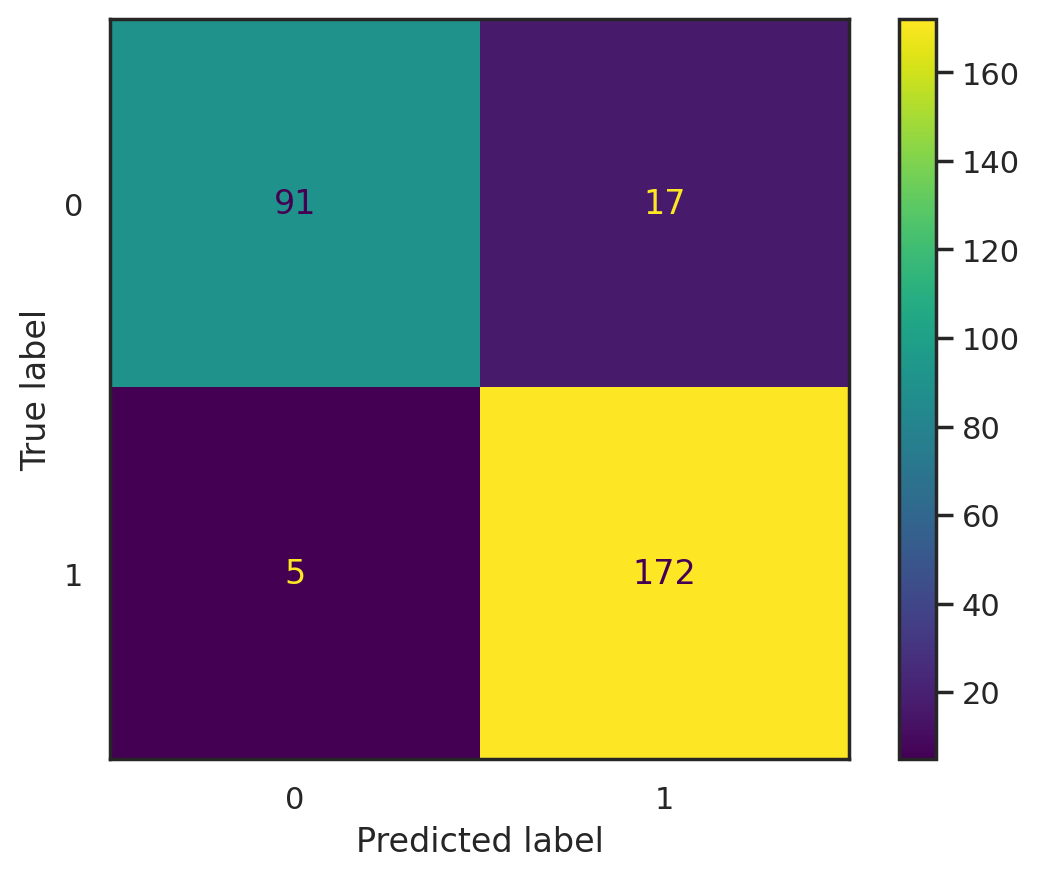

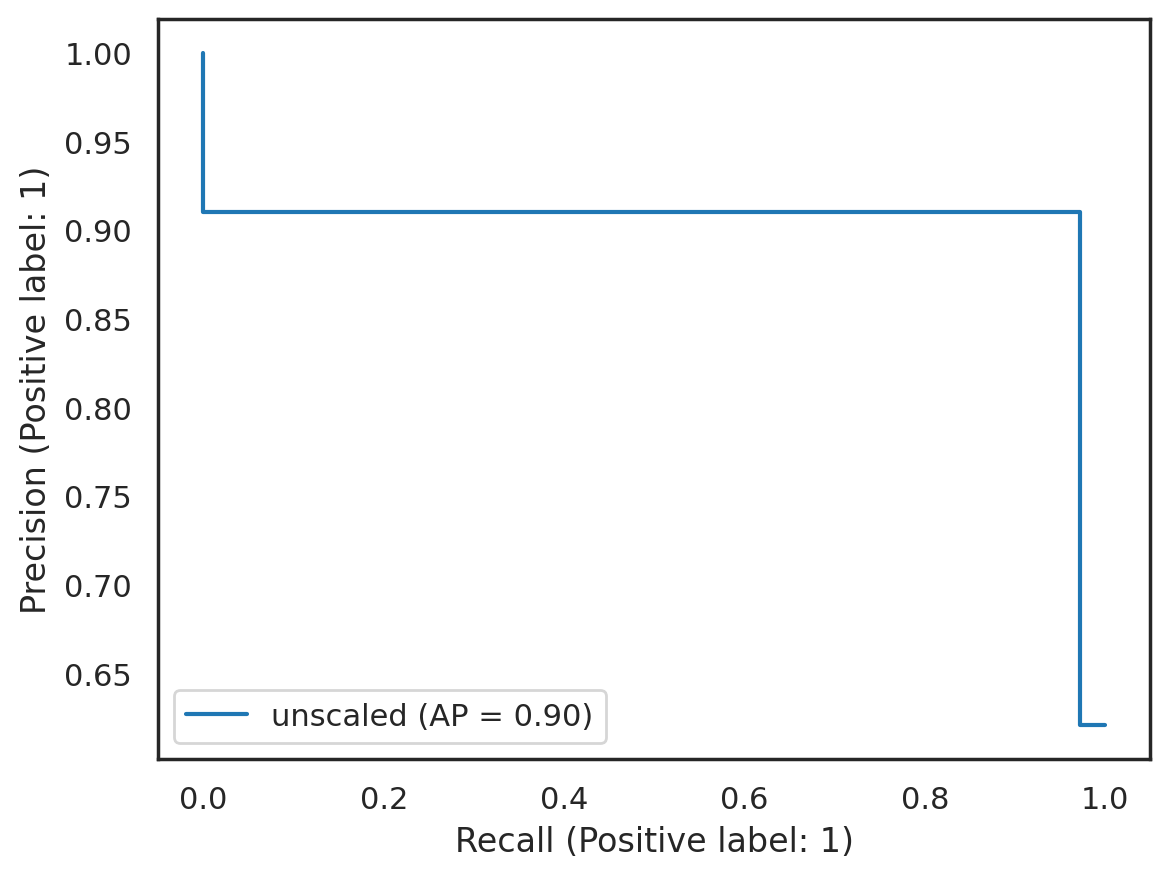

In [31]:
show_metrics(y_train, y_test, yhat_train, yhat_test, 'unscaled')


training set accuracy (n=284): 0.989
test set accuracy (n=285): 0.972

classificiation report on test set performance
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       108
           1       0.96      0.99      0.98       177

    accuracy                           0.97       285
   macro avg       0.98      0.96      0.97       285
weighted avg       0.97      0.97      0.97       285




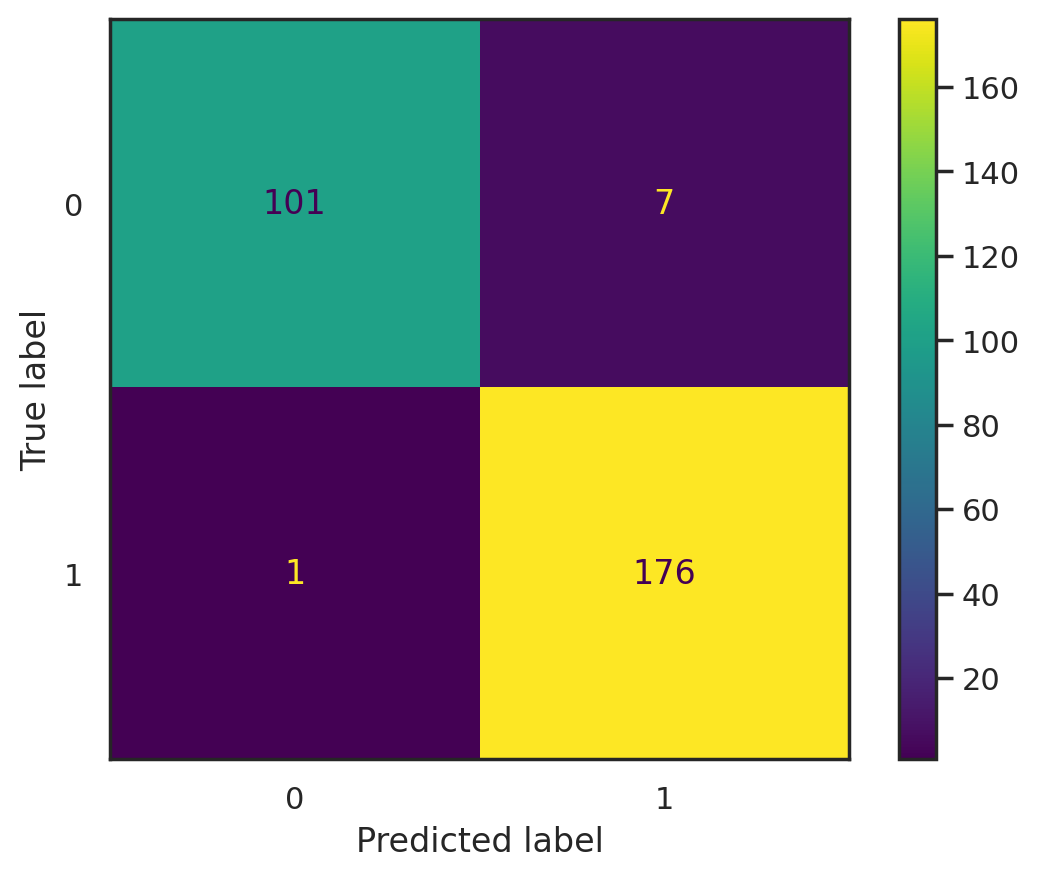

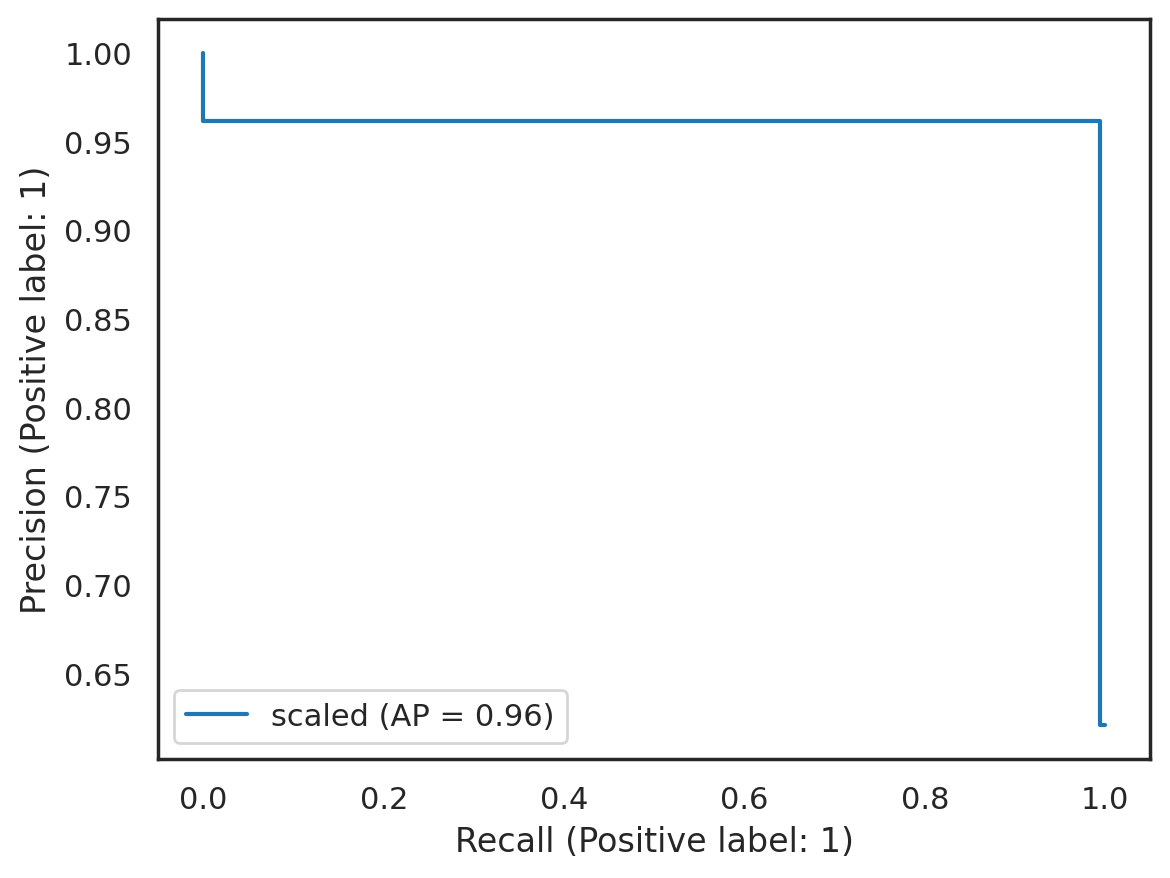

In [32]:
show_metrics(y_train, y_test, yhat_train_scaled, yhat_test_scaled, 'scaled')

Once again, scaled is a little bit better... large magnitude variables are not having disproportionate influence on teh decision boundary

OK... but what about if we wanted a different regularizer... there's a lot of variables here, maybe some of them are bogus/non-predictive.  If we want to drive the coefficients of unpredictive variables to 0, then we should use an L1 penalty instead of the default L2 penalty.

Except if you read the docs closely you will see that the default solver (LBGFS) is not able to do L1 penalty. So we pick another solver...

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


training set accuracy (n=284): 0.989
test set accuracy (n=285): 0.968

classificiation report on test set performance
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       108
           1       0.96      0.99      0.98       177

    accuracy                           0.97       285
   macro avg       0.97      0.96      0.97       285
weighted avg       0.97      0.97      0.97       285




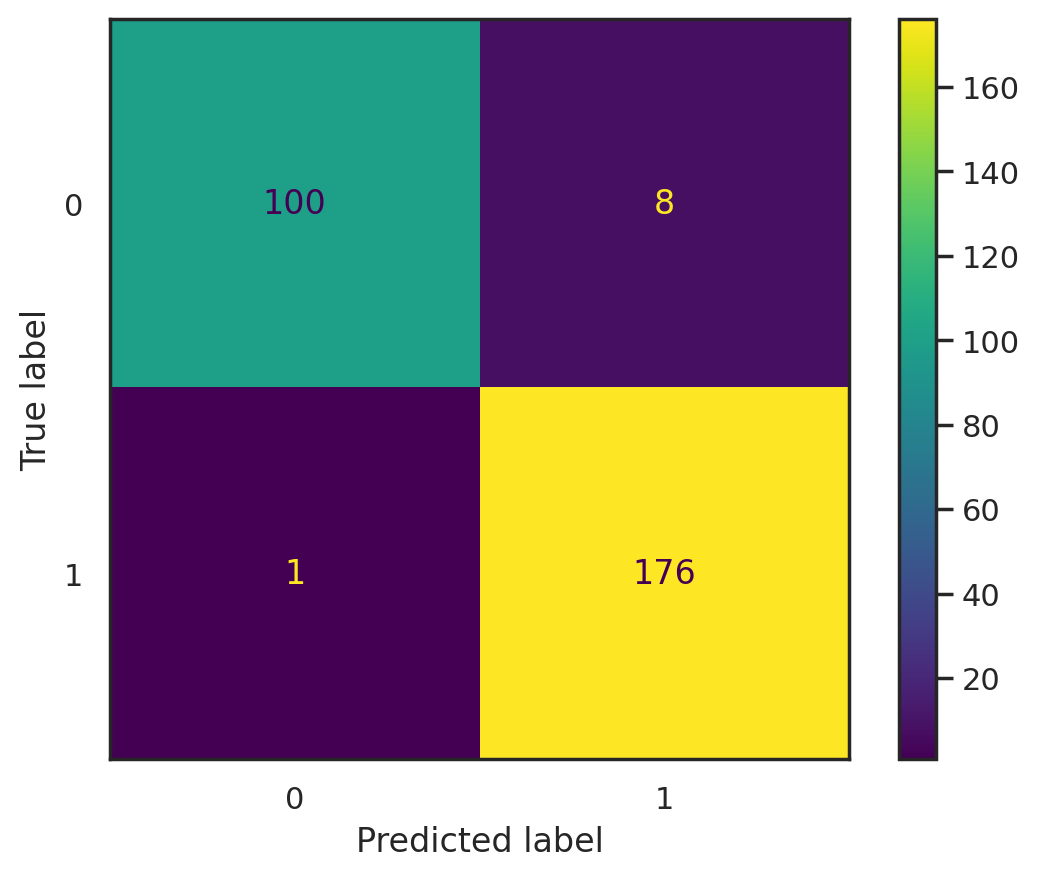

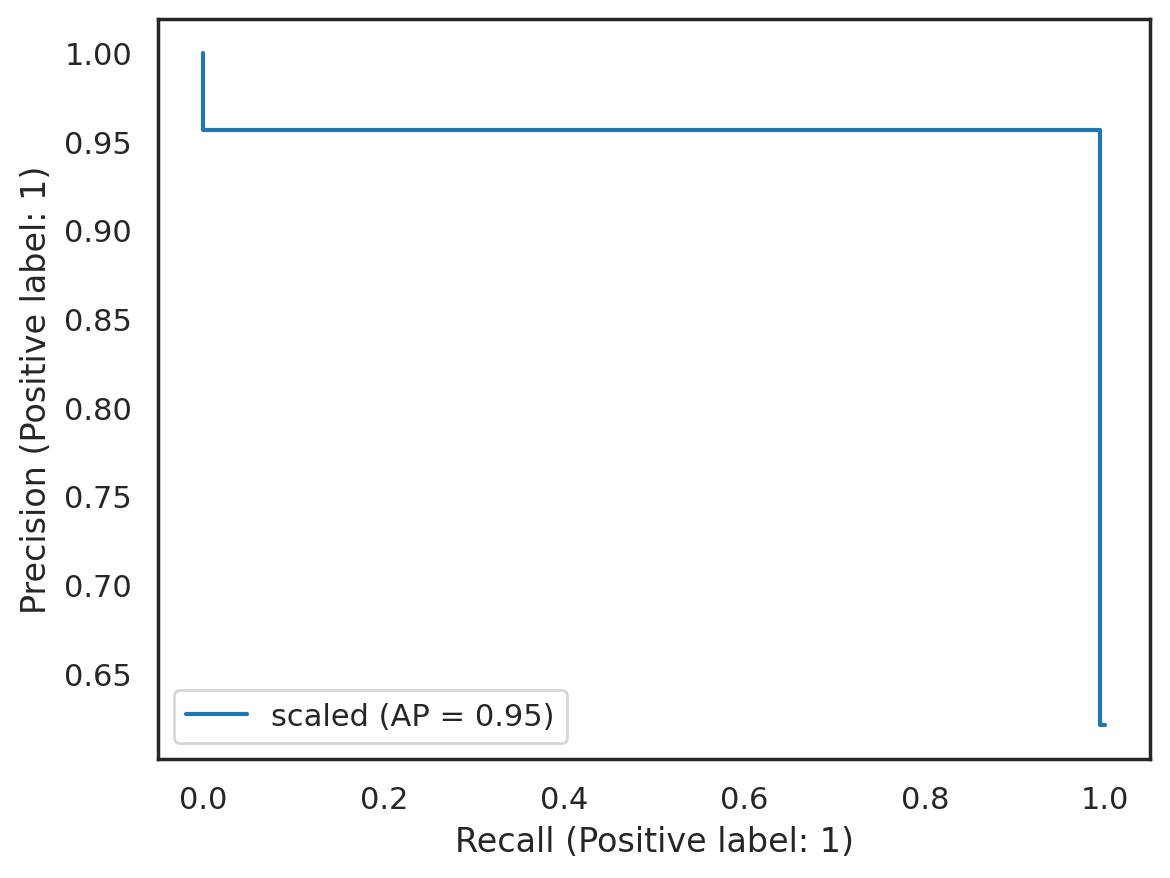

In [33]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
modelL1 = LogisticRegression(penalty='l1', solver='saga')


yhat_train_scaled_L1, yhat_test_scaled_L1 = train_test_predictions(modelL1, X_train_scaled, y_train, X_test_scaled)

show_metrics(y_train, y_test, yhat_train_scaled_L1, yhat_test_scaled_L1, 'scaled')

Ooops.  Didn't converge.  Try again with more iterations.

training set accuracy (n=284): 0.989
test set accuracy (n=285): 0.954

classificiation report on test set performance
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       108
           1       0.94      0.99      0.96       177

    accuracy                           0.95       285
   macro avg       0.96      0.94      0.95       285
weighted avg       0.96      0.95      0.95       285




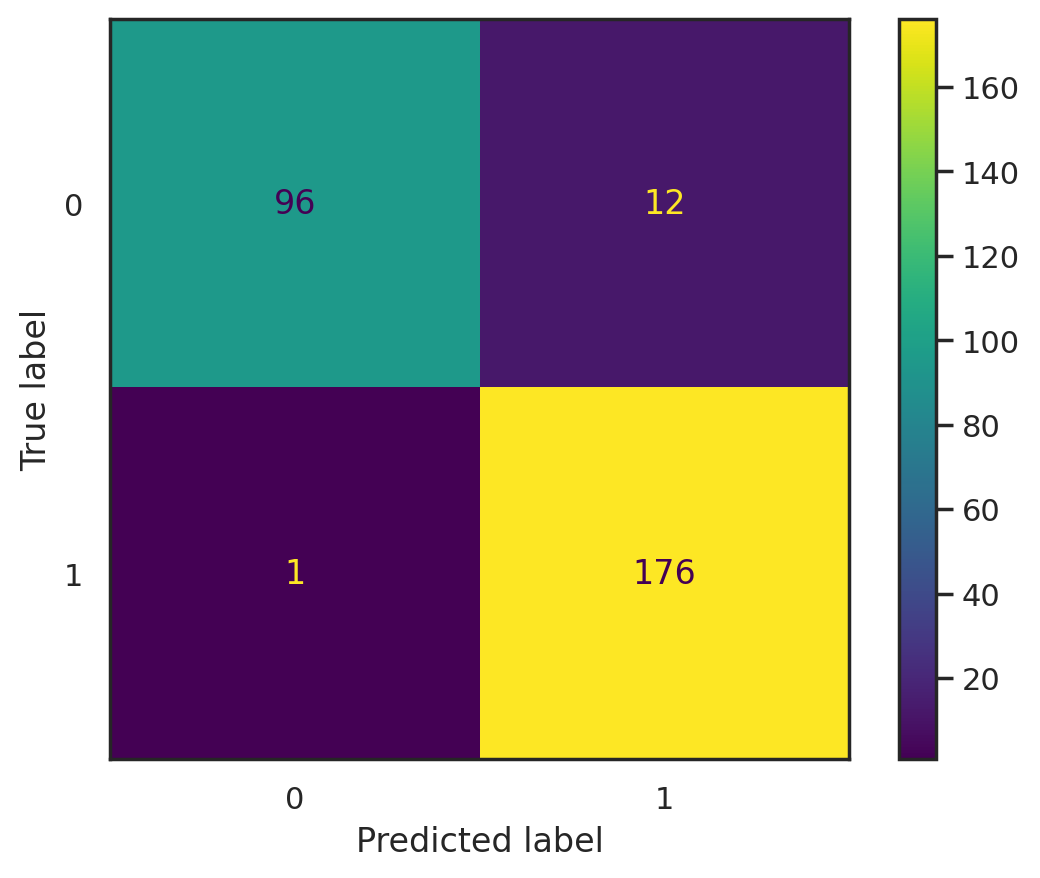

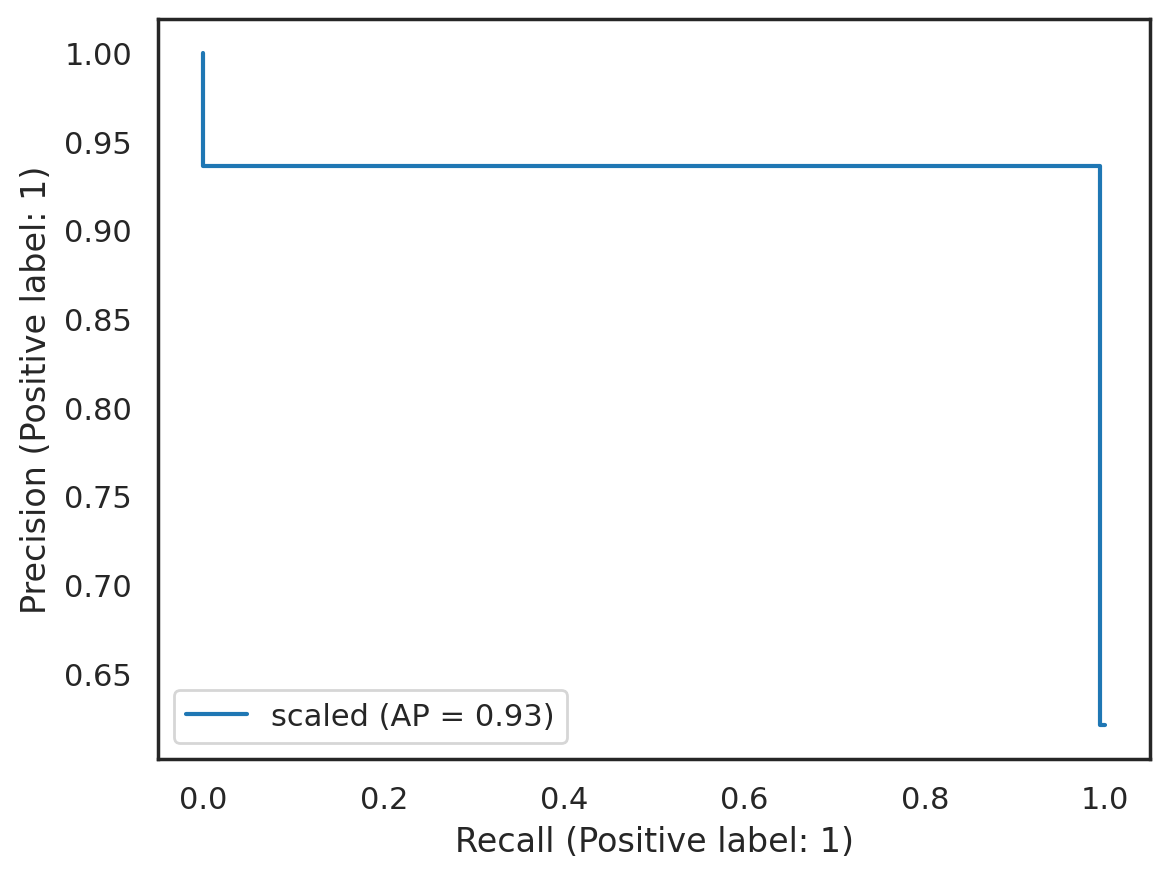

In [34]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
modelL1 = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)


yhat_train_scaled_L1, yhat_test_scaled_L1 = train_test_predictions(modelL1, X_train_scaled, y_train, X_test_scaled)

show_metrics(y_train, y_test, yhat_train_scaled_L1, yhat_test_scaled_L1, 'scaled')

OK, but can we do better?  What if we play with the value of $C$?

In our previous discussion of regularization I said it worked something like this:

$\mathcal{L}(\mathbf{w}) = (\textrm{some term about minimizing errors, like OLS or logit}) + \frac{\lambda}{2} \|\mathbf{w}\|$

When $\lambda$ is big, we care more about squishing the weights down and regularize harder.  An equivalent formulation (and the one used by sklearn) is 

$\mathcal{L}(\mathbf{w}) = C (\textrm{some term about minimizing errors, like OLS or logit}) +  \frac{1}{2} \|\mathbf{w}\|$

where $C=1/\lambda$.  So by making $C$ bigger, we actually reduce the strength of regularization and care more about minimizing errors.

I played with this a bit and found the following worked a bit better.



training set accuracy (n=284): 1.000
test set accuracy (n=285): 0.965

classificiation report on test set performance
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       108
           1       0.96      0.99      0.97       177

    accuracy                           0.96       285
   macro avg       0.97      0.96      0.96       285
weighted avg       0.97      0.96      0.96       285




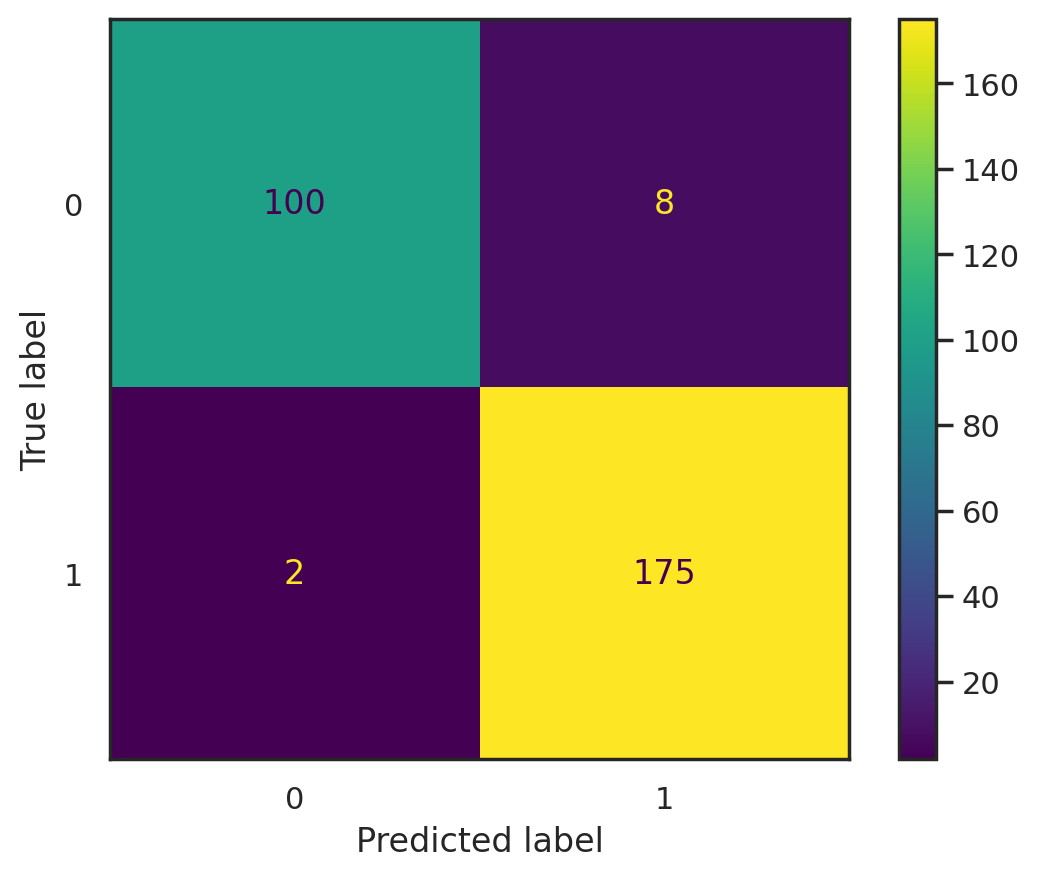

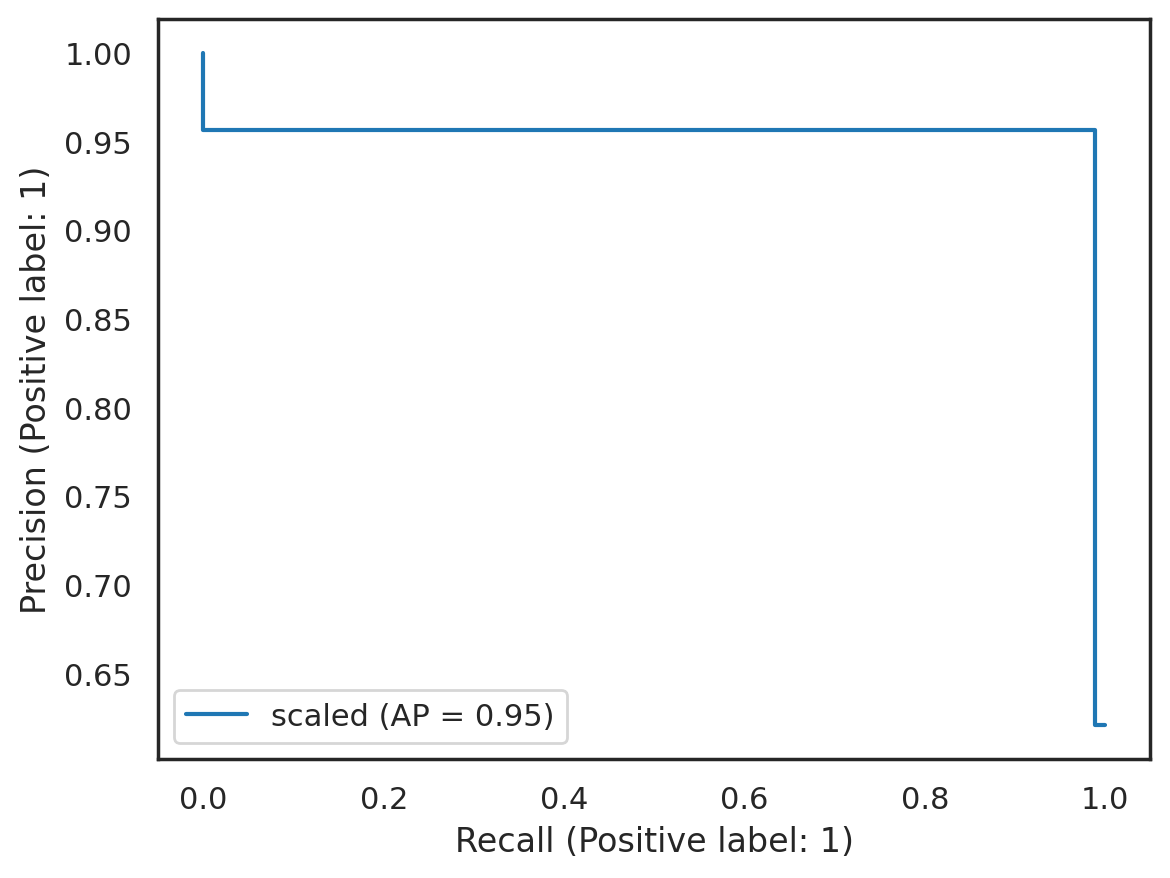

In [35]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
modelL1 = LogisticRegression(penalty='l1', max_iter=10000, C=10, solver='saga')


yhat_train_scaled_L1, yhat_test_scaled_L1 = train_test_predictions(modelL1, X_train_scaled, y_train, X_test_scaled)

show_metrics(y_train, y_test, yhat_train_scaled_L1, yhat_test_scaled_L1, 'scaled')